In [68]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import pydicom

pydf = pd.read_csv('non_pixel_array_data_OSIC_patient_dcm.csv')
pydf.head(3)

,Unnamed: 0,patient_ID,sop_Instance_UID,implementation_Class_UID,modality,body_Part,slice_Location,table_Height,image_Position_Patient,image_Orientation_Patient,patient_Position,spacing_Between_Slices,slice_Thickness,pixel_Spacing
0,0,ID00007637202177411956430,2.25.12297650151329871895440507938349160734,0.0,CT,Chest,-69.75,130.0,"[-158.700, -153.500, -69.750]","[1.000000, 0.000000, 0.000000, 0.000000, 1.000...",FFS,0.0,1.25,"[0.652344, 0.652344]"
1,1,ID00007637202177411956430,2.25.12297650151329871895440507938349160734,0.0,CT,Chest,-159.75,130.0,"[-158.700, -153.500, -159.750]","[1.000000, 0.000000, 0.000000, 0.000000, 1.000...",FFS,0.0,1.25,"[0.652344, 0.652344]"
2,2,ID00007637202177411956430,2.25.37611372879908126511187998276199853341,0.0,CT,Chest,-169.75,130.0,"[-158.700, -153.500, -169.750]","[1.000000, 0.000000, 0.000000, 0.000000, 1.000...",FFS,0.0,1.25,"[0.652344, 0.652344]"


In [69]:
train = pd.read_csv('data/train.csv')
# train.head(3)
train.groupby(['Patient']).count()

,Weeks,FVC,Percent,Age,Sex,SmokingStatus
Patient,,,,,,
ID00007637202177411956430,9,9,9,9,9,9
ID00009637202177434476278,9,9,9,9,9,9
ID00010637202177584971671,9,9,9,9,9,9
ID00011637202177653955184,9,9,9,9,9,9
ID00012637202177665765362,9,9,9,9,9,9
...,...,...,...,...,...,...
ID00419637202311204720264,9,9,9,9,9,9
ID00421637202311550012437,10,10,10,10,10,10
ID00422637202311677017371,8,8,8,8,8,8


In [70]:
df = pd.concat([pydf, train], axis = 1)
df.drop(columns = ['Unnamed: 0', 'Patient', 'implementation_Class_UID', 'body_Part', 'spacing_Between_Slices'], inplace = True)
df.head(3)

,patient_ID,sop_Instance_UID,modality,slice_Location,table_Height,image_Position_Patient,image_Orientation_Patient,patient_Position,slice_Thickness,pixel_Spacing,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00007637202177411956430,2.25.12297650151329871895440507938349160734,CT,-69.75,130.0,"[-158.700, -153.500, -69.750]","[1.000000, 0.000000, 0.000000, 0.000000, 1.000...",FFS,1.25,"[0.652344, 0.652344]",-4.0,2315.0,58.253649,79.0,Male,Ex-smoker
1,ID00007637202177411956430,2.25.12297650151329871895440507938349160734,CT,-159.75,130.0,"[-158.700, -153.500, -159.750]","[1.000000, 0.000000, 0.000000, 0.000000, 1.000...",FFS,1.25,"[0.652344, 0.652344]",5.0,2214.0,55.712129,79.0,Male,Ex-smoker
2,ID00007637202177411956430,2.25.37611372879908126511187998276199853341,CT,-169.75,130.0,"[-158.700, -153.500, -169.750]","[1.000000, 0.000000, 0.000000, 0.000000, 1.000...",FFS,1.25,"[0.652344, 0.652344]",7.0,2061.0,51.862104,79.0,Male,Ex-smoker


In [71]:


cols = ['image_Position_Patient', 'image_Orientation_Patient',
       'pixel_Spacing']
# df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
# df[cols] = df[cols].astype(np.float)
df[cols] = df[cols].to_numpy()

str_columns_to_convert_to = ['patient_ID', 'sop_Instance_UID', 'modality', 
       'patient_Position','Sex', 'SmokingStatus']
float_columns_to_convert_to = ['slice_Location', 'table_Height', 
        'slice_Thickness', 'Percent', 'Age']

df[str_columns_to_convert_to] = df[str_columns_to_convert_to].astype(str)
df = df.fillna(0)
df[float_columns_to_convert_to] = df[float_columns_to_convert_to].apply(pd.to_numeric, errors='coerce')
# df[float_columns_to_convert_to] = df[float_columns_to_convert_to].astype(int)
df.dtypes

patient_ID                    object
sop_Instance_UID              object
modality                      object
slice_Location               float64
table_Height                 float64
image_Position_Patient        object
image_Orientation_Patient     object
patient_Position              object
slice_Thickness              float64
pixel_Spacing                 object
Weeks                        float64
FVC                          float64
Percent                      float64
Age                          float64
Sex                           object
SmokingStatus                 object
dtype: object

In [79]:
cardinality = df.select_dtypes(exclude='number').nunique()
cardinality

patient_ID                     176
sop_Instance_UID             33026
modality                         2
image_Position_Patient       31758
image_Orientation_Patient       14
patient_Position                 5
pixel_Spacing                  129
Sex                              3
SmokingStatus                    4
dtype: int64

In [ ]:
train, val = train_test_split(df, train_size=0.70, test_size=0.30, random_state=42)

target = 'FVC'

# Get a dataframe with all train columns except the target & id
train_features = train.drop(columns=[target, 'patient_ID'])

# Get a list of the numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

# Get a series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

# Get a list of all categorical features with cardinality <= 50
categorical_features = cardinality[cardinality <= 50].index.tolist()

# Combine the lists 
features = numeric_features 


# Arrange data into X features matrix and y target vector 
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

train.shape, val.shape

In [80]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

encoder = ce.OneHotEncoder(use_cat_names=True)
imputer = SimpleImputer()
scaler = StandardScaler()
model = LogisticRegression(max_iter=1000)

X_train_encoded = encoder.fit_transform(X_train)
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_train_scaled = scaler.fit_transform(X_train_imputed)
model.fit(X_train_scaled, y_train)

X_test_encoded = encoder.transform(X_test)
X_test_imputed = imputer.transform(X_test_encoded)
X_test_scaled = scaler.transform(X_test_imputed)
y_pred = model.predict(X_test_scaled)

In [82]:
# TODO
from sklearn.preprocessing import StandardScaler
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names = True),
    SimpleImputer(strategy ='mean'),
    StandardScaler(),
    LogisticRegression(max_iter=1000)


)
#Fit on Train
pipeline.fit(X_train, y_train)
#Score on Val
print('Validation Accuracy', pipeline.score(X_test, y_test))

Validation Accuracy 0.9532067162124965


In [83]:

#coefficients
#scikit learn regression
pipeline.named_steps['logisticregression'].coef_

array([[-0.09684626, -0.06703482,  0.26125478, -0.80933653, -2.11610555,
        -2.60936181],
       [ 0.68594891,  0.26226285, -0.11135542,  0.56935042, -1.13990582,
         0.55992588],
       [ 0.71067681,  0.24824125, -0.12331013,  0.88065331, -1.09604753,
         0.58690256],
       ...,
       [ 0.5562554 ,  0.29147997, -0.10049675, -0.31722457,  1.55490376,
         0.12934104],
       [ 0.50852732,  0.22757828, -0.09388384, -0.70347617,  1.57799066,
         0.11192719],
       [ 0.41655302,  0.16881294, -0.07932011, -1.04339467,  1.79525565,
         0.09309206]])

In [84]:

encoder.transform(X_test).columns

Index(['slice_Location', 'table_Height', 'slice_Thickness', 'Weeks', 'Percent',
       'Age'],
      dtype='object')

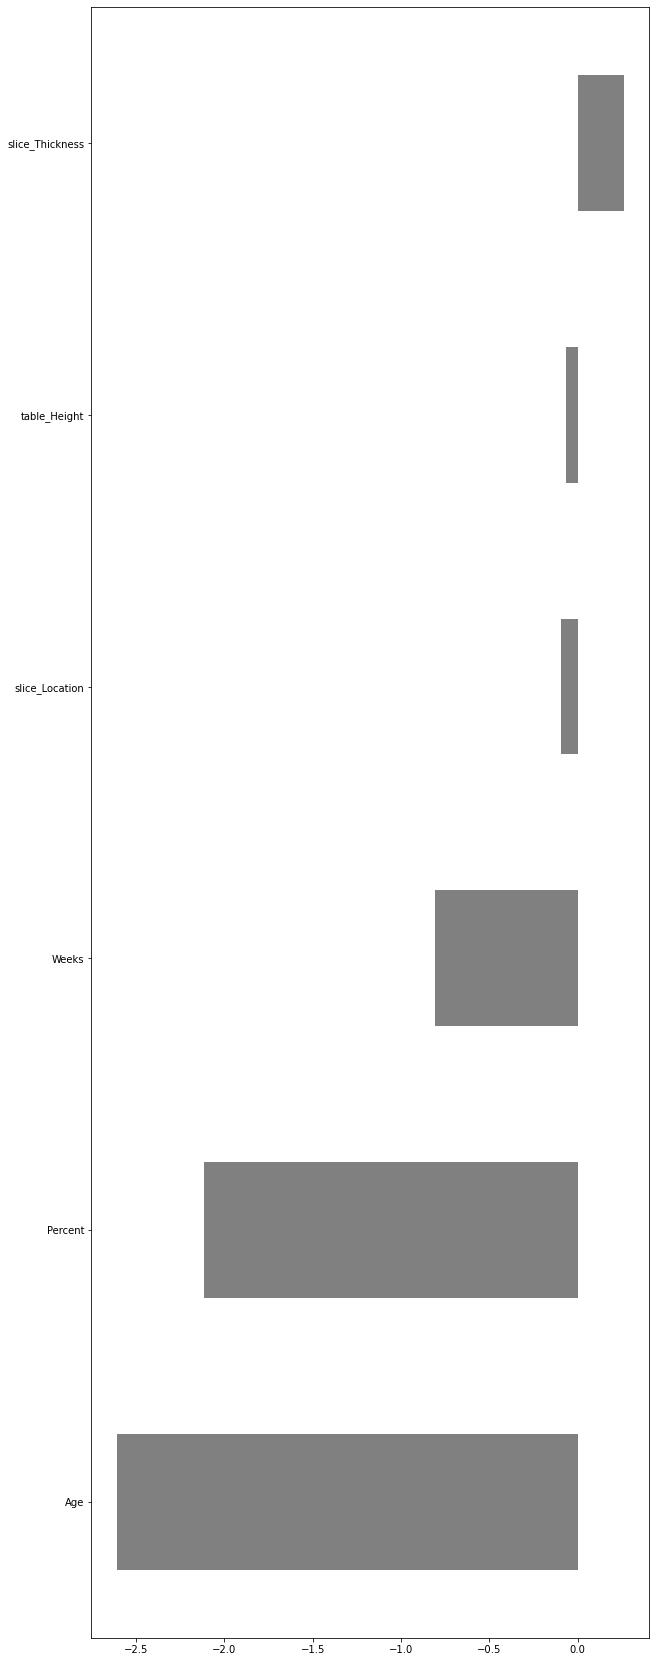

In [86]:
%matplotlib inline
import matplotlib.pyplot as plt

model = pipeline.named_steps['logisticregression']
encoder = pipeline.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_test).columns
coefficients = pd.Series(model.coef_[0], encoded_columns)
plt.figure(figsize=(10,30))
coefficients.sort_values().plot.barh(color='grey');

In [87]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, minimal=True).to_notebook_iframe()

profile

ModuleNotFoundError: No module named 'pandas_profiling'

In [72]:
from sklearn.model_selection import train_test_split

target = 'FVC'
# features = ['patient_ID', 'sop_Instance_UID', 'modality', 'slice_Location',
#        'table_Height', 'image_Position_Patient', 'image_Orientation_Patient',
#        'patient_Position', 'slice_Thickness', 'pixel_Spacing', 'Weeks',
#        'Percent', 'Age', 'Sex', 'SmokingStatus']

numericfeatures = ['slice_Location','table_Height', 'slice_Thickness', 
 'Weeks','Percent', 'Age']

X = df[numericfeatures]
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

[(100.0, 7000.0), (0.0, 0.0006)]

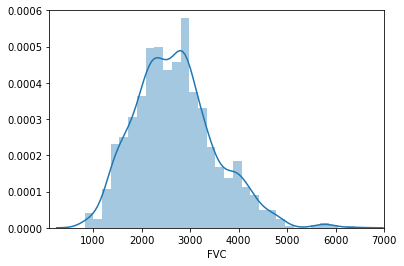

In [9]:
from scipy.stats import norm

nonzero = y_train[y_train > 10]

plot = sns.distplot(nonzero)
plot = plot.set(xlim=(100,7000),ylim=(0,0.0006))
plot

In [ ]:
g = sns.pairplot(df, hue="Age", palette="husl",
                 diag_kind="kde", markers="+",
                 plot_kws=dict(s=50, edgecolor="b", linewidth=1),
                 diag_kws=dict(shade=True))

In [ ]:
g = sns.pairplot(df, hue="SmokingStatus", palette="husl",
                 diag_kind="kde", markers="+",
                 plot_kws=dict(s=50, edgecolor="b", linewidth=1),
                 diag_kws=dict(shade=True))

In [10]:
from sklearn.metrics import mean_absolute_error

guess = y_train.median()

y_pred = [guess] * len(y_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'Mean Absolute Error Taking the Median: {mae:.2f} percentage points')

Mean Absolute Error Taking the Median: 126.19 percentage points


In [60]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

numericfeatures = ['slice_Location','table_Height', 'slice_Thickness', 
 'Weeks','Percent', 'Age']
X_trainlr = df[numericfeatures]

model.fit(X_trainlr, y_train)
y_pred = model.predict(X_trainlr)
mae = mean_absolute_error(y_train, y_pred)
print(f'Train Error: {mae:.2f} percentage points')

Train Error: 25.00 percentage points


In [61]:
model.intercept_, model.coef_

(-8.041059001252762,
 array([-7.31914866e-04,  3.91448213e-02,  3.22875000e+00, -6.68491982e-02,
         3.14539764e+01,  3.70349129e+00]))

In [76]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((22128, 6), (22128,), (10899, 6), (10899,))

ValueError: x and y must have same first dimension, but have shapes (5,) and (0,)

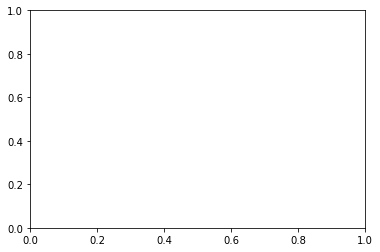

In [77]:
from IPython.display import display, HTML
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), 
                         LinearRegression(**kwargs))


polynomial_degrees = range(1, 10, 2)
train_r2s = []
test_r2s = []

for degree in polynomial_degrees:
    model = PolynomialRegression(degree)
    display(HTML(f'Polynomial degree={degree}'))
    
    model.fit(X_train, y_train)
    train_r2 = model.score(X_train, y_train)
    test_r2 = model.score(X_test, y_test)
    display(HTML(f'<b style="color: blue">Train R2 {train_r2:.2f}</b>'))
    display(HTML(f'<b style="color: red">Test R2 {test_r2:.2f}</b>'))

#     plt.scatter(X_train, y_train, color='blue', alpha=0.5)
#     plt.scatter(X_test, y_test, color='red', alpha=0.5)
#     plt.xlabel(features)
#     plt.ylabel(target)
    
#     x_domain = np.linspace(X.min(), X.max())
#     curve = model.predict(x_domain)
#     plt.plot(x_domain, curve, color='blue')
#     plt.show()
#     display(HTML('<hr/>'))
    
#     train_r2s.append(train_r2)
#     test_r2s.append(test_r2)
    
display(HTML('Validation Curve'))
plt.plot(polynomial_degrees, train_r2s, color='blue', label='Train')
plt.plot(polynomial_degrees, test_r2s, color='red', label='Test')
plt.xlabel('Model Complexity (Polynomial Degree)')
plt.ylabel('R^2 Score')
plt.legend()
plt.show()

In [42]:
[i for i, j in zip(features, just_floats) if i == j]

[]

In [43]:
features

['patient_ID',
 'sop_Instance_UID',
 'modality',
 'slice_Location',
 'table_Height',
 'image_Position_Patient',
 'image_Orientation_Patient',
 'patient_Position',
 'slice_Thickness',
 'pixel_Spacing',
 'Weeks',
 'Percent',
 'Age',
 'Sex',
 'SmokingStatus']

In [44]:
just_floats

,Weeks,FVC
0,-4.0,2315.0
1,5.0,2214.0
2,7.0,2061.0
3,9.0,2144.0
4,11.0,2069.0
...,...,...
33022,0.0,0.0
33023,0.0,0.0
33024,0.0,0.0
33025,0.0,0.0


In [ ]:
features = ['Percent']
target = 'FVC'
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)
# Credit for PolynomialRegression: Jake VanderPlas, Python Data Science Handbook, Chapter 5.3
# https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html#Validation-curves-in-Scikit-Learn
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), 
                         LinearRegression(**kwargs))


polynomial_degrees = range(1, 10, 2)
train_r2s = []
test_r2s = []

for degree in polynomial_degrees:
    model = PolynomialRegression(degree)
    display(HTML(f'Polynomial degree={degree}'))
    
    model.fit(X_train, y_train)
    train_r2 = model.score(X_train, y_train)
    test_r2 = model.score(X_test, y_test)
    display(HTML(f'<b style="color: blue">Train R2 {train_r2:.2f}</b>'))
    display(HTML(f'<b style="color: red">Test R2 {test_r2:.2f}</b>'))

    plt.scatter(X_train, y_train, color='blue', alpha=0.5)
    plt.scatter(X_test, y_test, color='red', alpha=0.5)
    plt.xlabel(features)
    plt.ylabel(target)
    
    x_domain = np.linspace(X.min(), X.max())
    curve = model.predict(x_domain)
    plt.plot(x_domain, curve, color='blue')
    plt.show()
    display(HTML('<hr/>'))
    
    train_r2s.append(train_r2)
    test_r2s.append(test_r2)
    
display(HTML('Validation Curve'))
plt.plot(polynomial_degrees, train_r2s, color='blue', label='Train')
plt.plot(polynomial_degrees, test_r2s, color='red', label='Test')
plt.xlabel('Model Complexity (Polynomial Degree)')
plt.ylabel('R^2 Score')
plt.legend()
plt.show()